In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv("car data.csv")
print("First 5 rows of dataset:")
df.head()

First 5 rows of dataset:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [29]:
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [30]:
df.duplicated().sum()

np.int64(2)

In [31]:
df=df.drop_duplicates()
df['brand']= df['Car_Name'].str.split().str[0]
df['car_age']= 2024-df['Year']


In [32]:
df=df.drop(['Car_Name','Year'], axis=1,)

In [33]:
print(df.head())


   Selling_Price  Present_Price  Driven_kms Fuel_Type Selling_type  \
0           3.35           5.59       27000    Petrol       Dealer   
1           4.75           9.54       43000    Diesel       Dealer   
2           7.25           9.85        6900    Petrol       Dealer   
3           2.85           4.15        5200    Petrol       Dealer   
4           4.60           6.87       42450    Diesel       Dealer   

  Transmission  Owner  brand  car_age  
0       Manual      0   ritz       10  
1       Manual      0    sx4       11  
2       Manual      0   ciaz        7  
3       Manual      0  wagon       13  
4       Manual      0  swift       10  


In [34]:
df=pd.get_dummies(df,drop_first=True)
print(df.head())
print(df.columns)

   Selling_Price  Present_Price  Driven_kms  Owner  car_age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       10             False   
1           4.75           9.54       43000      0       11              True   
2           7.25           9.85        6900      0        7             False   
3           2.85           4.15        5200      0       13             False   
4           4.60           6.87       42450      0       10              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  \
0              True                    False                 True   
1             False                    False                 True   
2              True                    False                 True   
3              True                    False                 True   
4             False                    False                 True   

   brand_Activa  ...  brand_land  brand_omni  brand_ritz  brand_s  \
0         False  ...       Fa

In [35]:
from numpy.random.mtrand import random
x= df.drop('Selling_Price',axis =1 )
y= df['Selling_Price']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
print("training samples:", x_train.shape[0])
print("testing samples:", x_test.shape[0])

training samples: 239
testing samples: 60


In [36]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred= model.predict(x_test)

In [38]:
r2= r2_score(y_test,y_pred)
mae= mean_absolute_error(y_test, y_pred)
print("r2 score:", round(r2, 3))
print("mean absolute error:", round(mae, 2))


r2 score: 0.553
mean absolute error: 1.81


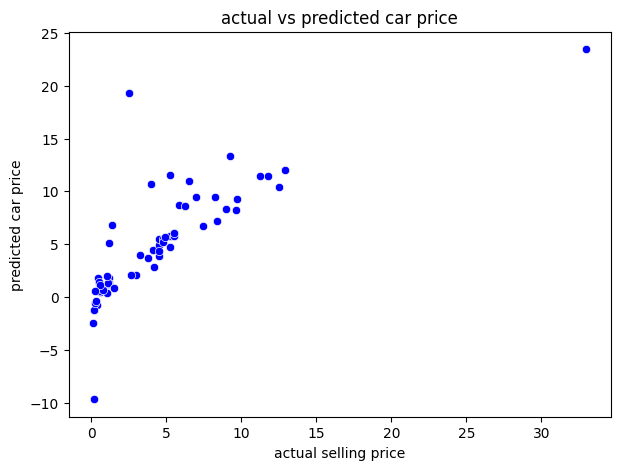

In [39]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test,y= y_pred, color='blue')
plt.xlabel("actual selling price")
plt.ylabel("predicted car price")
plt.title("actual vs predicted car price")
plt.show()

In [40]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train,y_train)


GradientBoostingRegressor(random_state=42)

In [41]:
y_pred= gb_model.predict(x_test)
print("r2 score:", r2_score(y_test,y_pred))
print("mean absolute error:", mean_absolute_error(y_test,y_pred))

r2 score: 0.7041831008301865
mean absolute error: 1.189771272672996


In [42]:
rf_model= RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [44]:
y_pred=rf_model.predict(x_test)
print("r2 score:", r2_score(y_test, y_pred))
print("mean absolute error:", mean_absolute_error(y_test, y_pred))

r2 score: 0.6038445663326538
mean absolute error: 1.3454755555555553
